<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

excel_file_path = '/content/Titanic.xlsx'
df = pd.read_excel(excel_file_path)

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Count the number of unique cabin types per passenger class
cabin_counts_by_pclass = df.groupby('Pclass')['Cabin'].nunique()

print("Number of unique cabin types per Passenger Class:")
print(cabin_counts_by_pclass)

Number of unique cabin types per Passenger Class:
Pclass
1    133
2      7
3      7
Name: Cabin, dtype: int64


In [ ]:
# Find the maximum and minimum age
max_age = df['Age'].max()
min_age = df['Age'].min()

print(f"Maximum Age: {max_age}")
print(f"Minimum Age: {min_age}")

Maximum Age: 80.0
Minimum Age: 0.42


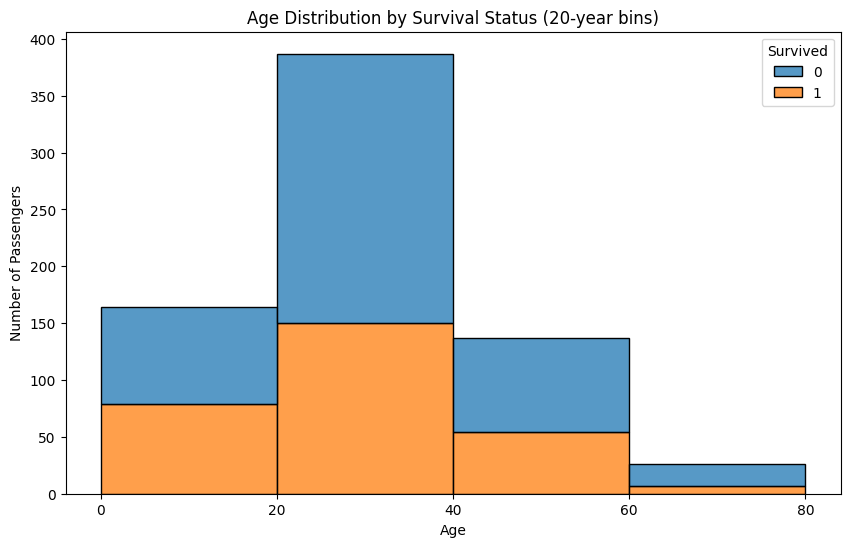

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define age bins
age_bins = np.arange(0, df['Age'].max() + 20, 20)
age_labels = [f'{int(i)}-{int(i+19)}' for i in age_bins[:-1]]

# Create a new column with age bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=age_bins, kde=False, multiple="stack")
plt.title('Age Distribution by Survival Status (20-year bins)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.xticks(age_bins)
plt.show()

In [ ]:
# Calculate the average age for male and female passengers
average_age_by_sex = df.groupby('Sex')['Age'].mean()

print("Average Age by Sex:")
print(average_age_by_sex)

Average Age by Sex:
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


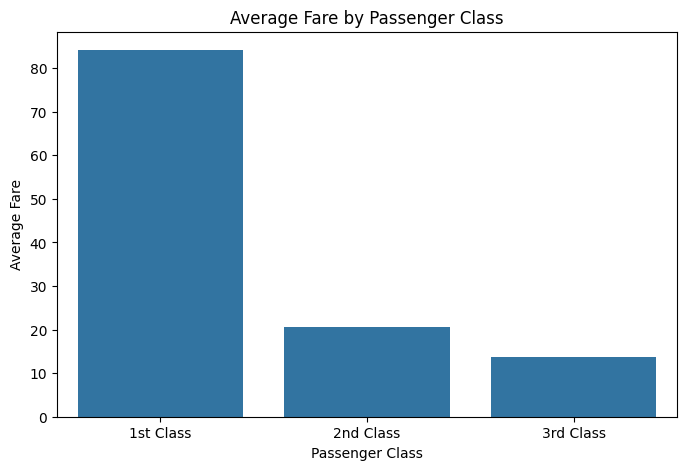

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average fare for each passenger class
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()

# Map Pclass numbers to descriptive labels
average_fare_by_pclass['Pclass'] = average_fare_by_pclass['Pclass'].map({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Fare', data=average_fare_by_pclass)
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

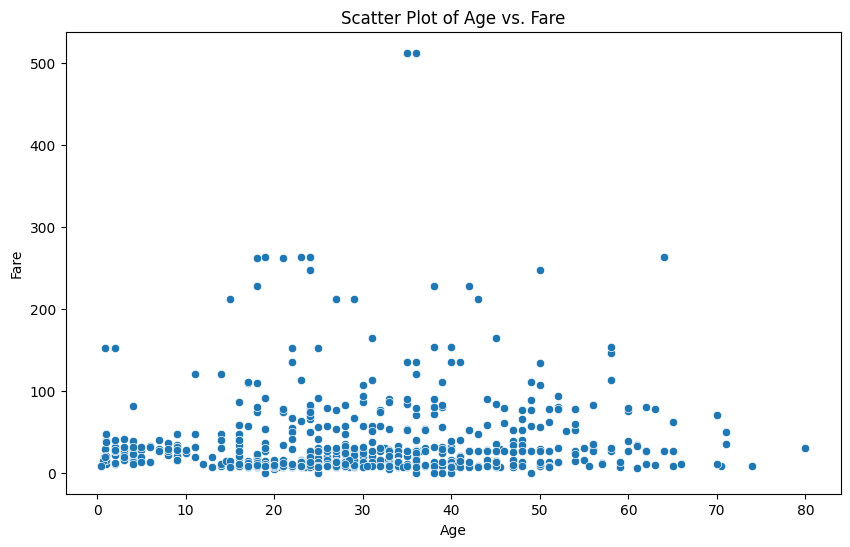

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Age and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

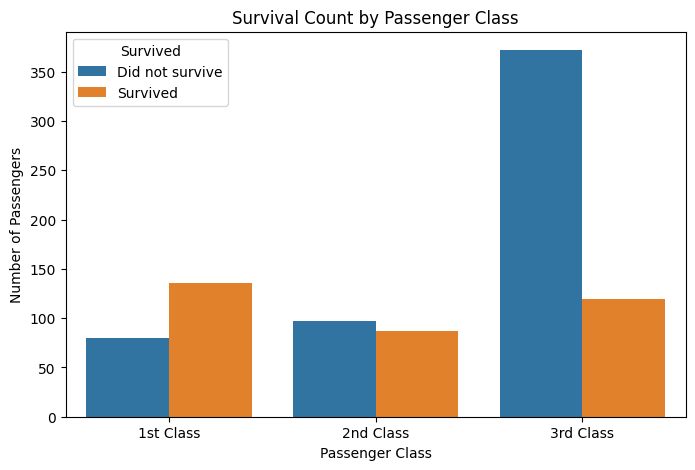

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of survivors and non-survivors for each passenger class
survived_pclass_counts = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

# Map 0 to 'Did not survive' and 1 to 'Survived' for better readability
survived_pclass_counts['Survived'] = survived_pclass_counts['Survived'].map({0: 'Did not survive', 1: 'Survived'})

# Map Pclass numbers to descriptive labels
survived_pclass_counts['Pclass'] = survived_pclass_counts['Pclass'].map({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})


# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Count', hue='Survived', data=survived_pclass_counts)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

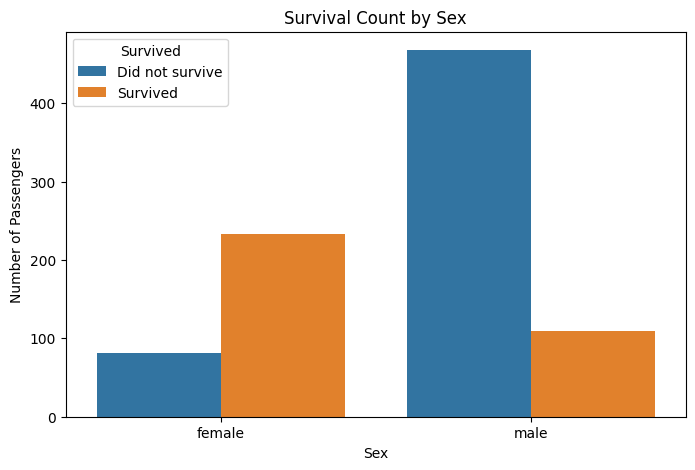

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of survivors and non-survivors for each sex
survived_sex_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Map 0 to 'Did not survive' and 1 to 'Survived' for better readability
survived_sex_counts['Survived'] = survived_sex_counts['Survived'].map({0: 'Did not survive', 1: 'Survived'})

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Count', hue='Survived', data=survived_sex_counts)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

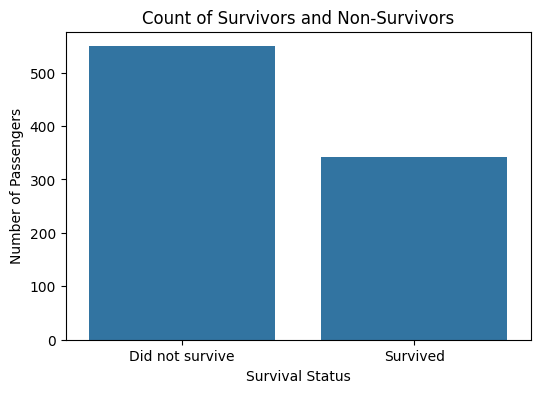

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of survivors and non-survivors
survived_counts = df['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']

# Map 0 to 'Did not survive' and 1 to 'Survived'
survived_counts['Survived'] = survived_counts['Survived'].map({0: 'Did not survive', 1: 'Survived'})

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Survived', y='Count', data=survived_counts)
plt.title('Count of Survivors and Non-Survivors')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()

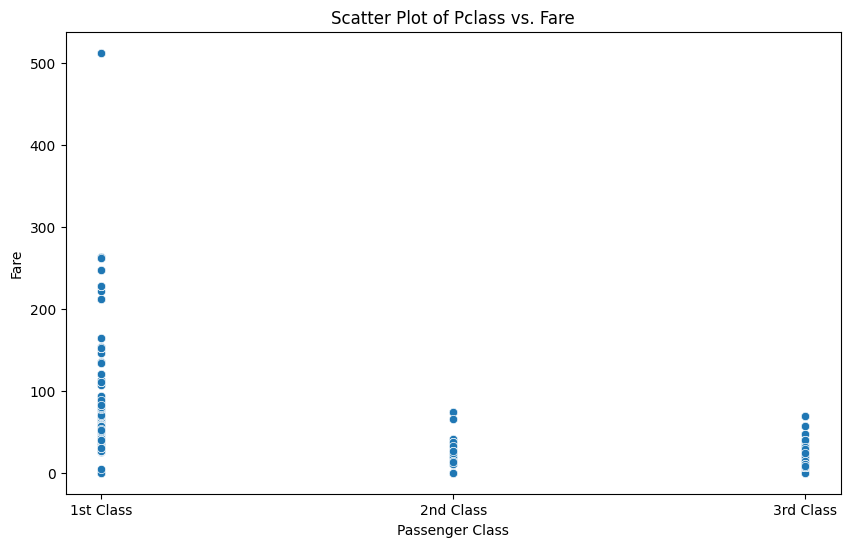

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

excel_file_path = '/content/Titanic.xlsx'
df = pd.read_excel(excel_file_path)

# Create a scatter plot of Fare and Pclass
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pclass', y='Fare')
plt.title('Scatter Plot of Pclass vs. Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class']) # Label the x-axis ticks
plt.show()